In [1]:
import pandas as pd # used for data analysis, cleaning and manipulation
import numpy as np # used primarily for calculations, because they are optimized for speed
import yfinance as yf # API to pull in financial data
import matplotlib.pyplot as plt # used for visualization purposes
import statsmodels.api as sm # used for varying statistical analyses

In [2]:
data = yf.download("^GSPC", start="2021-01-01", end="2022-01-01") # this returns tick data (OHLC along with Adj Close and Volume)
# we primarily use Adj Close because it 'adjusts' the close data for stock splits

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5015000000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4591020000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6064110000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5099160000
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4773040000
...,...,...,...,...,...,...
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2770290000
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2707920000
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2963310000


In [4]:
data.columns.values # returns the names of all the columns present in the data

array(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [5]:
data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [6]:
# indexing
data["High"] # returns a pandas series
# type(data["High"])
data[["High"]] # returns a pandas dataframe
# type(data[["High"]])
data.High # same as data["High"]
# type(data.High)

Date
2021-01-04    3769.989990
2021-01-05    3737.830078
2021-01-06    3783.040039
2021-01-07    3811.550049
2021-01-08    3826.689941
                 ...     
2021-12-27    4791.490234
2021-12-28    4807.020020
2021-12-29    4804.060059
2021-12-30    4808.930176
2021-12-31    4786.830078
Name: High, Length: 252, dtype: float64

In [7]:
data["High"] + data["Open"]

Date
2021-01-04    7534.600098
2021-01-05    7435.850098
2021-01-06    7495.239990
2021-01-07    7576.260010
2021-01-08    7641.739990
                 ...     
2021-12-27    9525.480469
2021-12-28    9602.510254
2021-12-29    9592.700195
2021-12-30    9603.160156
2021-12-31    9562.040039
Length: 252, dtype: float64

In [8]:
data[["High"]].High + data[["Open"]].Open

Date
2021-01-04    7534.600098
2021-01-05    7435.850098
2021-01-06    7495.239990
2021-01-07    7576.260010
2021-01-08    7641.739990
                 ...     
2021-12-27    9525.480469
2021-12-28    9602.510254
2021-12-29    9592.700195
2021-12-30    9603.160156
2021-12-31    9562.040039
Length: 252, dtype: float64

In [9]:
#indexing cont'd
data.iloc[1, 1] # returns the value in the second row of the second column
data.iloc[0, :] # returns the entire first row
data.iloc[:, 0] # returns the entire first column
data.iloc[:, :] # returns the entire dataframe
data.iloc[:, 0] # returns the entire first column

Date
2021-01-04    3764.610107
2021-01-05    3698.020020
2021-01-06    3712.199951
2021-01-07    3764.709961
2021-01-08    3815.050049
                 ...     
2021-12-27    4733.990234
2021-12-28    4795.490234
2021-12-29    4788.640137
2021-12-30    4794.229980
2021-12-31    4775.209961
Name: Open, Length: 252, dtype: float64

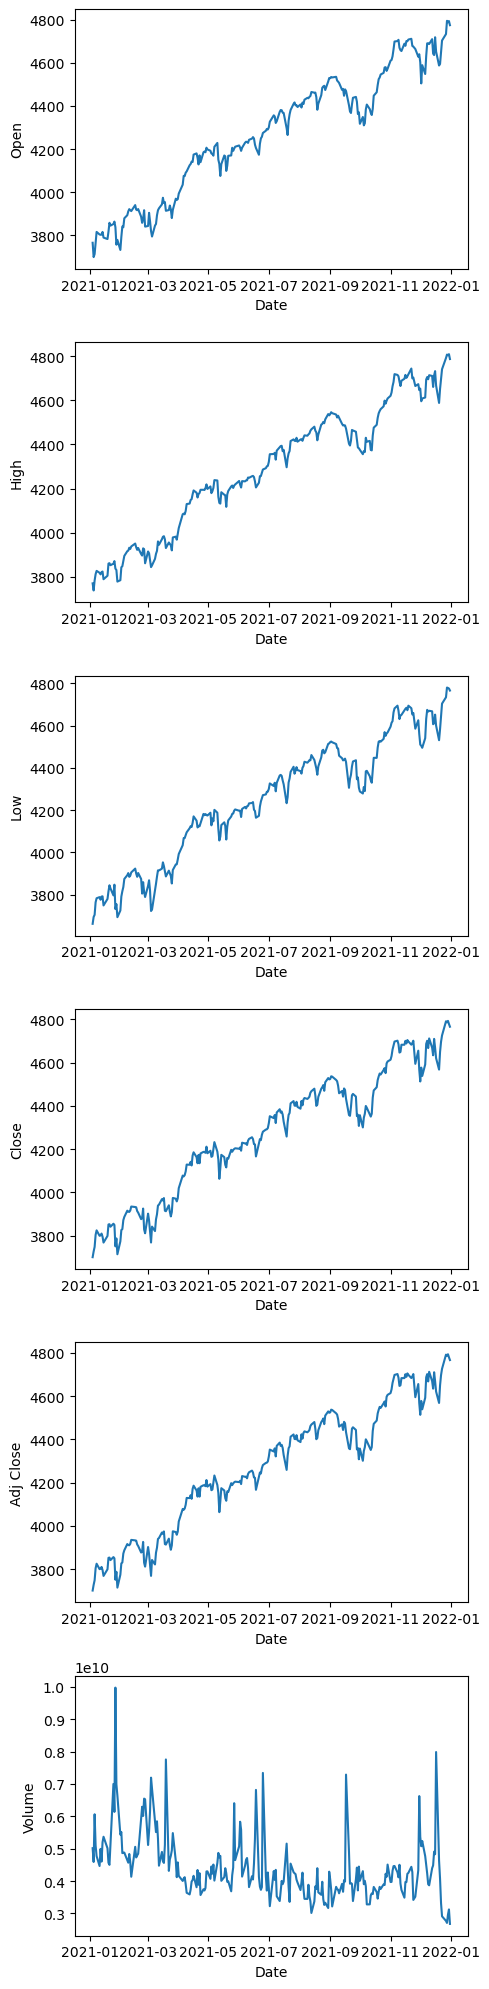

In [10]:
# indexing cont'd
data.loc[:, ["Open", "Close"]]

fig, axes = plt.subplots(len(data.columns.values), 1, figsize=(5, 20))

for idx, column in enumerate(data.columns.values):
    axes[idx].plot(data.loc[:,column])
    axes[idx].set(ylabel=column, xlabel="Date")
    plt.tight_layout()

In [11]:
# practice - convert the code above to use .iloc instead of .loc

## More interesting stuff - calculating returns

In [12]:
# getting the necessary data

data = yf.download(["^GSPC", "WMT"], start="2010-01-01")["Adj Close"] # downloads and stores the 'adjusted close' data for the s&p500 and walmart
data.columns = ["spy", "wmt"] # renames the columns in the dataframe

data

[*********************100%***********************]  2 of 2 completed


,spy,wmt
Date,,
2010-01-04,40.329693,1132.989990
2010-01-05,39.928104,1136.520020
2010-01-06,39.838848,1137.140015
2010-01-07,39.861172,1141.689941
2010-01-08,39.660374,1144.979980
...,...,...
2023-02-01,144.669998,4119.209961
2023-02-02,143.619995,4179.759766
2023-02-03,141.710007,4136.479980


In [13]:
returns_1 = data.pct_change().dropna(axis=0) # calculates the daily percent change (shown below), then removes all rows with NaN values
# 'axis = 0' refers to rows, while 'axis = 1' refers to columns
returns_1

,spy,wmt
Date,,
2010-01-05,-0.009958,0.003116
2010-01-06,-0.002235,0.000546
2010-01-07,0.000560,0.004001
2010-01-08,-0.005037,0.002882
2010-01-11,0.016501,0.001747
...,...,...
2023-02-01,0.005561,0.010452
2023-02-02,-0.007258,0.014699
2023-02-03,-0.013299,-0.010355


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date', ylabel='Returns'>

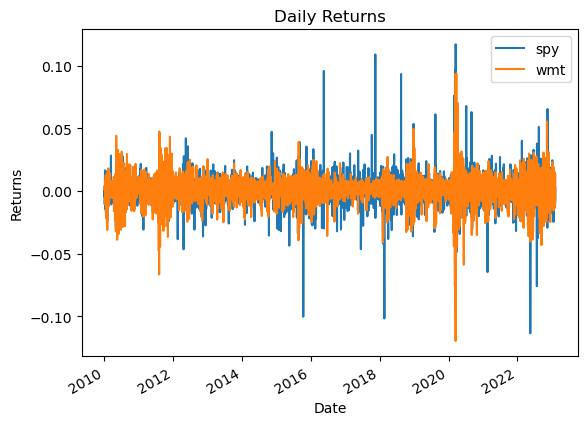

In [14]:
returns_1.plot(title="Daily Returns", ylabel="Returns")

In [15]:
(data.iloc[1, 0] / data.iloc[0, 0]) - 1

-0.009957636958180971

In [16]:
returns_2 = (data/data.shift(1)).dropna(axis=0) # does something similar to the cell above, however it does not subtract 1

returns_2

,spy,wmt
Date,,
2010-01-05,0.990042,1.003116
2010-01-06,0.997765,1.000546
2010-01-07,1.000560,1.004001
2010-01-08,0.994963,1.002882
2010-01-11,1.016501,1.001747
...,...,...
2023-02-01,1.005561,1.010452
2023-02-02,0.992742,1.014699
2023-02-03,0.986701,0.989645


In [17]:
# log_returns

log_rets = np.log((data/data.shift(1)).dropna(axis=0)) # calculates the log returns

log_rets

,spy,wmt
Date,,
2010-01-05,-0.010008,0.003111
2010-01-06,-0.002238,0.000545
2010-01-07,0.000560,0.003993
2010-01-08,-0.005050,0.002878
2010-01-11,0.016366,0.001745
...,...,...
2023-02-01,0.005545,0.010398
2023-02-02,-0.007284,0.014592
2023-02-03,-0.013388,-0.010409


In [18]:
# cumulative returns

cum_returns_1 = (1+returns_1).cumprod() - 1
cum_returns_2 = returns_2.cumprod() - 1

In [19]:
(data.iloc[-1, :] - data.iloc[0, :])/data.iloc[0, :]

spy    2.495687
wmt    2.675231
dtype: float64

In [20]:
cum_returns_1.iloc[-1, :]

spy    2.495687
wmt    2.675231
Name: 2023-02-07 00:00:00, dtype: float64

In [21]:
cum_returns_2.iloc[-1, :]

spy    2.495687
wmt    2.675231
Name: 2023-02-07 00:00:00, dtype: float64

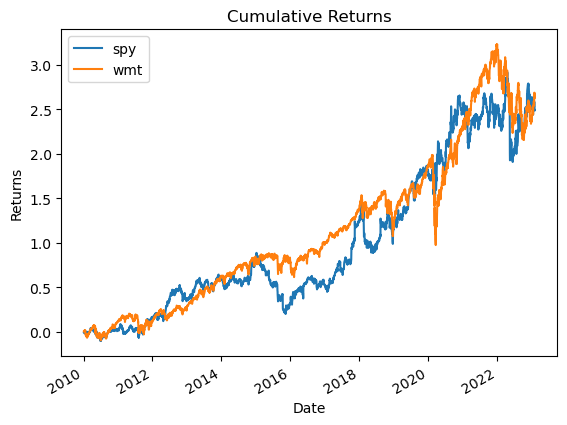

In [22]:
(cum_returns_1).plot(title="Cumulative Returns", ylabel="Returns")
plt.show()

In [23]:
X = returns_1.spy
y = returns_1.wmt
X_const = sm.add_constant(X)# an intercept is not added by default, so it is up to the user to add it

model = sm.OLS(y, X_const)
reg = model.fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wmt   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     897.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.23e-174
Time:                        17:35:06   Log-Likelihood:                 10522.
No. Observations:                3296   AIC:                        -2.104e+04
Df Residuals:                    3294   BIC:                        -2.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.534      0.125   -7.39e-05       0.001
spy            0.4223      0.014     29.962      0.000       0.395       0.450
==============================================================================
Omnibus:                      635.242   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12140.612
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                      12.373   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print(f"The beta of the stock is {round(reg.params[1], 2)}")

The beta of the stock is 0.42


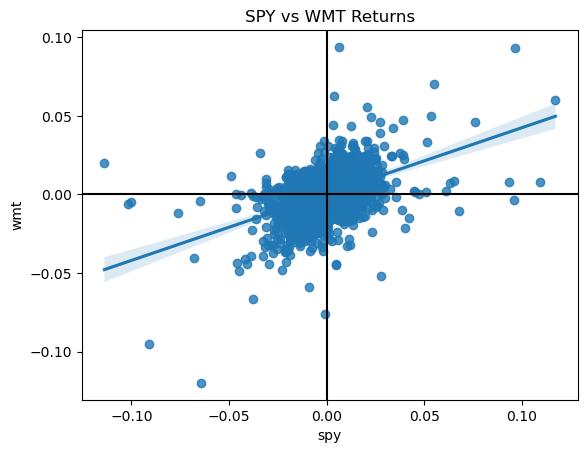

In [25]:
import seaborn as sns # another visualization library
sns.regplot(x="spy", y="wmt", data=returns_1) # ci=None to turn off confidence interval
plt.title("SPY vs WMT Returns")
plt.axvline(0, color = "black")
plt.axhline(0, color = "black")
plt.show()